### Convex Hull calculation in QIIME2

- This tutorial is assuming you have a working QIIME2 2023.5 or later environment.

- If you are working within a QIIME2 environment, generating hulls plots from a table and metadata is simple and requires only two commands.

- If you are not using QIIME2, please navigate to the other standalone tutorial provided in this repo. [[link](https://github.com/dpear/q2-convexhull2/blob/main/tutorials/01-ch-visualizations-tutorial.ipynb)]

### Generate an Ordination

- If you have already calculated an ordination as an `PCoAResult` object, you can skip the ordination calculation step.

- For this tutorial we will use RPCA, which is described here: [https://github.com/biocore/gemelli](https://github.com/biocore/gemelli)

In [3]:
! qiime gemelli rpca \
    --i-table data/table.qza \
    --o-biplot data/rpca-biplot.qza \
    --o-distance-matrix data/rpca-dmat.qza

Saved PCoAResults % Properties('biplot') to: data/rpca-biplot.qza
Saved DistanceMatrix to: data/rpca-dmat.qza


Alternatively if you wish to use a QIIME2 builtin distance function you could generate an ordination using the following:

In [4]:
! qiime diversity beta \
    --i-table data/table.qza \
    --p-metric 'braycurtis' \
    --o-distance-matrix data/braycurtis-dmat.qza 
    
! qiime diversity pcoa \
    --i-distance-matrix data/braycurtis-dmat.qza \
    --o-pcoa data/braycurtis-pcoa.qza

Saved DistanceMatrix to: data/braycurtis-dmat.qza
Saved PCoAResults to: data/braycurtis-pcoa.qza


### Run `hulls-plots`

- Use the command line `hulls-plots` function to generate a QIIME2 visualization.
- `qiime convexhull2 hulls-plots --help` will provide more information on the required and optional inputs.
- Notably, you can control the angle at which the plots are viewed using the `--p-rotation` parameter and whether or not axes are shown using `--p-axis` 

In [1]:
!qiime convexhull2 hulls-plots \
    --i-ordination data/rpca-biplot.qza \
    --m-metadata-file data/metadata.tsv \
    --p-groupc 'exposure_type' \
    --p-subjc 'host_subject_id' \
    --p-timec 'age_match' \
    --o-visualization data/hulls_out

/Users/daniperry/anaconda3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/qiime2/metadata/io.py:365: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.replace('', np.nan)
Saved Visualization to: data/hulls_out.qzv


### Use view to access plots

Navigate to [https://view.qiime2.org/](https://view.qiime2.org/) and upload the saved `data/hulls_out.qzv` file in order to view in your browser.

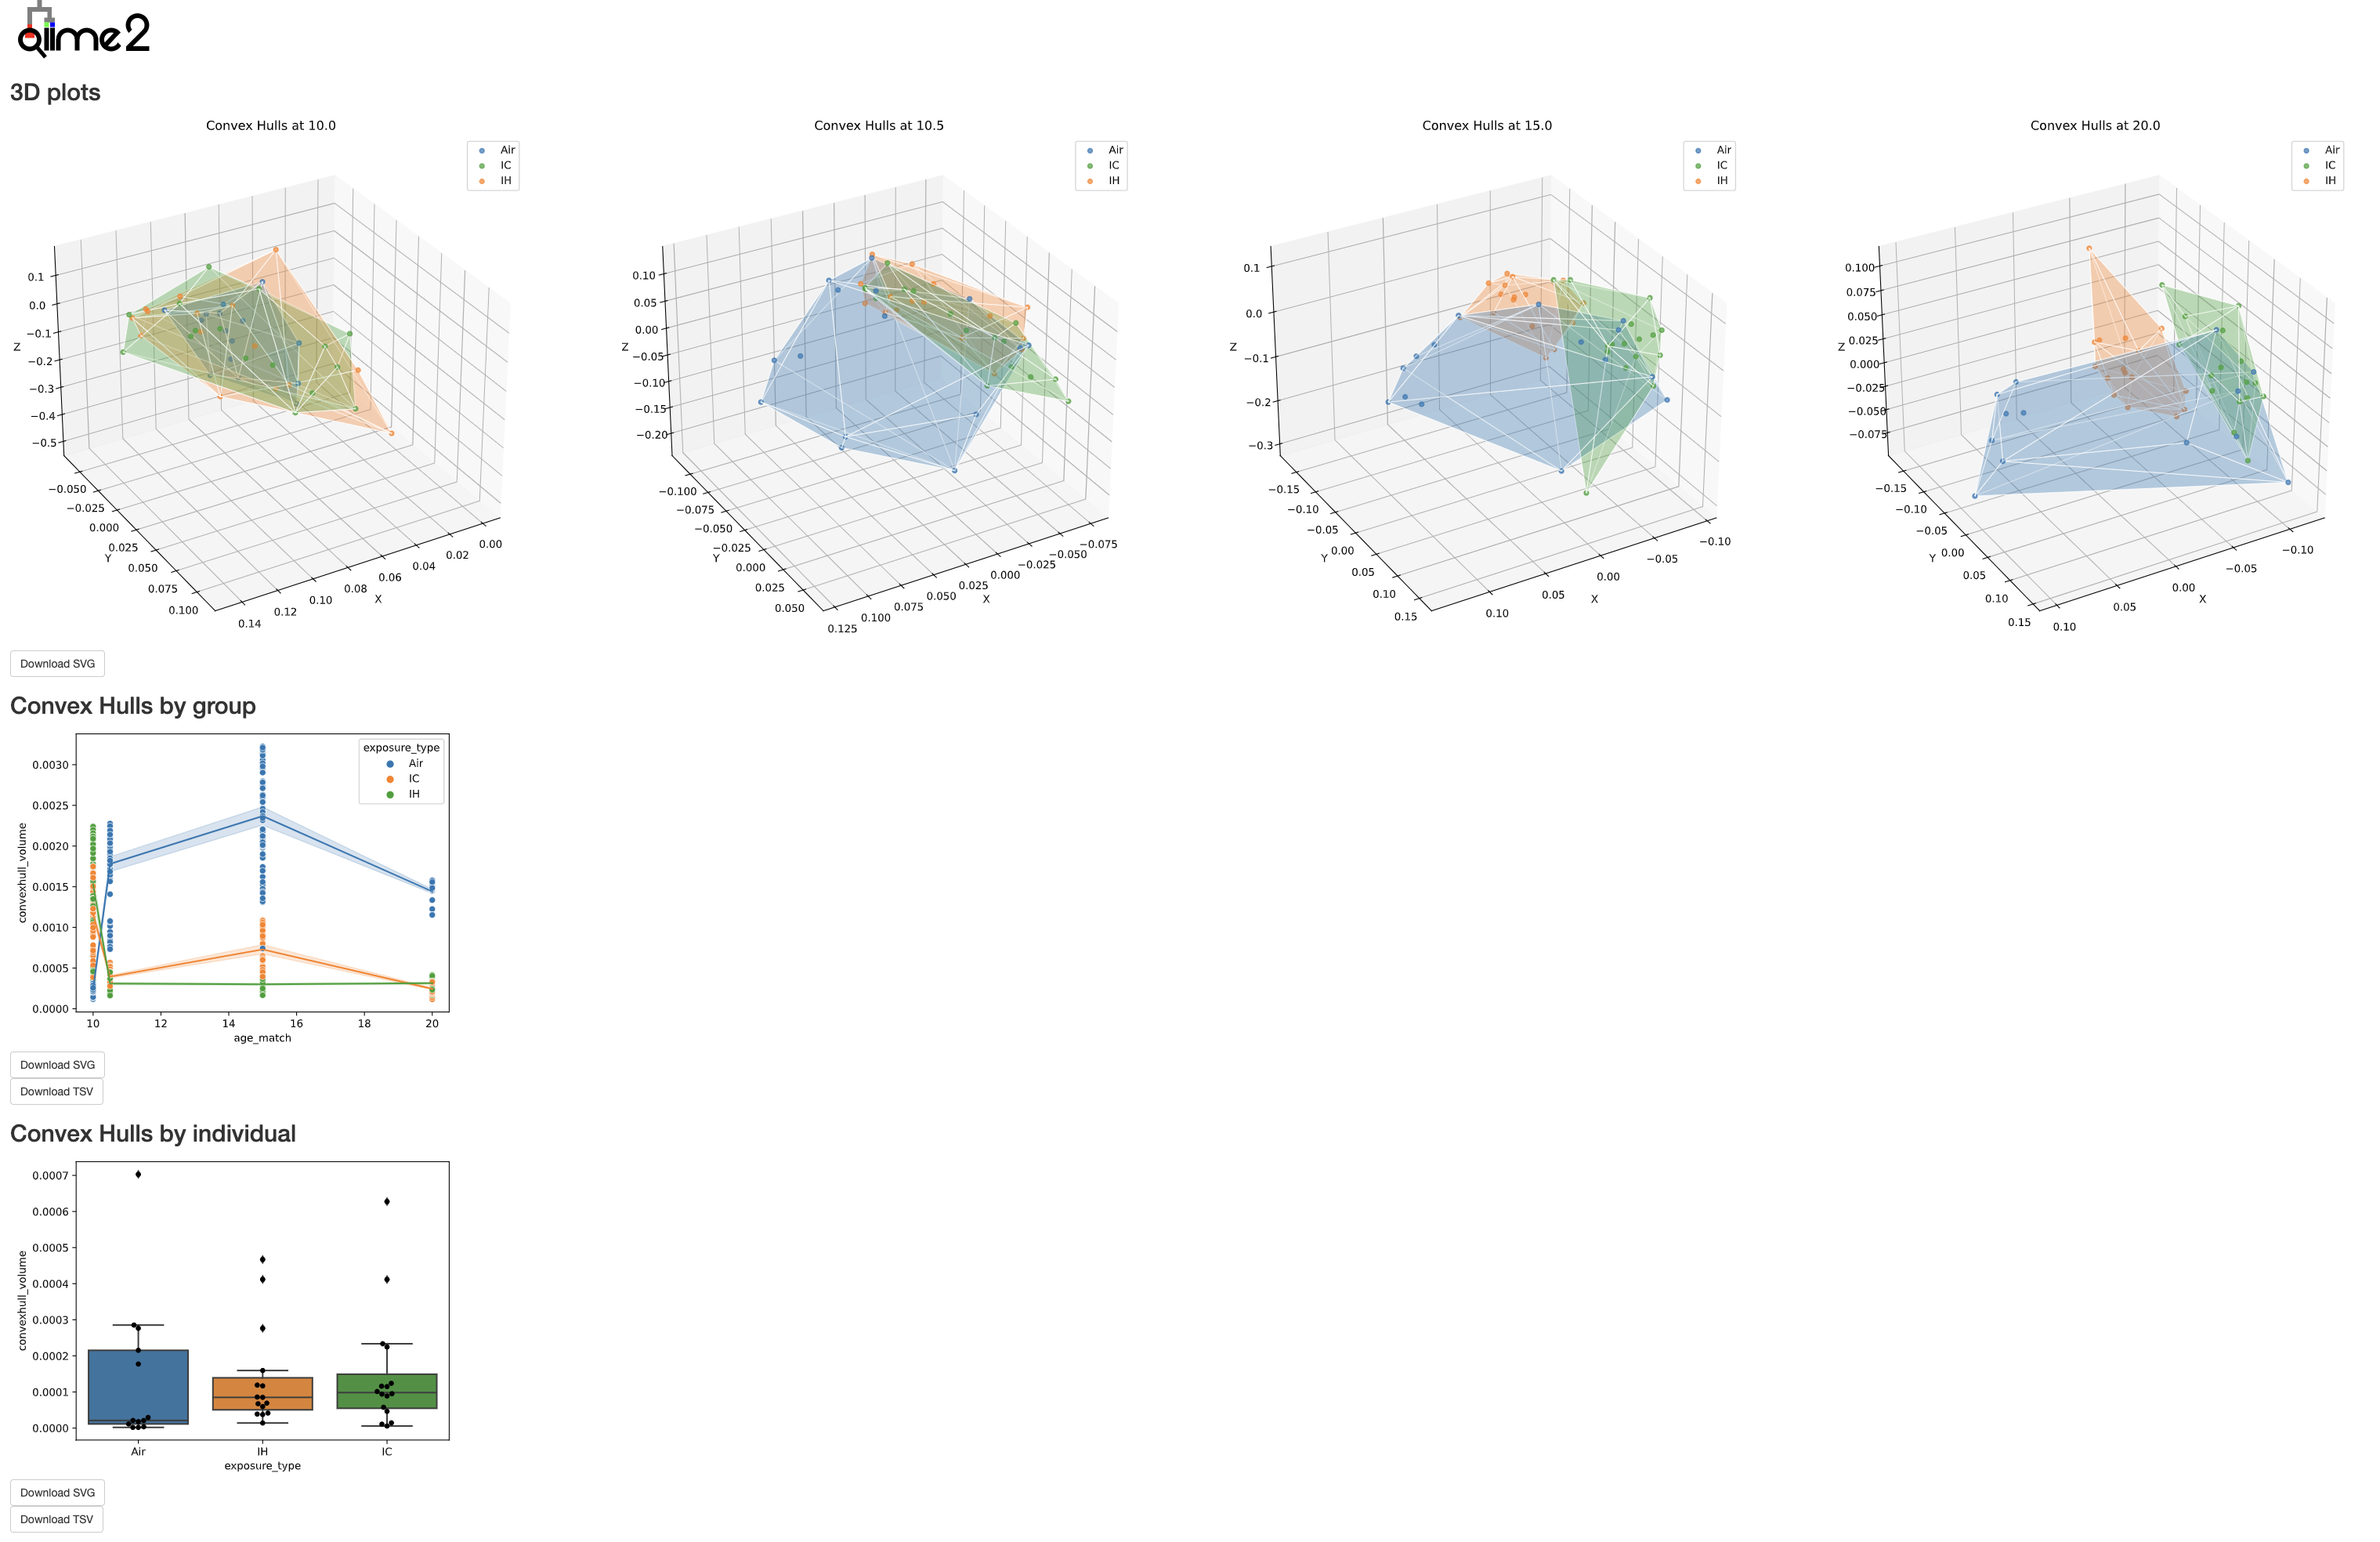